## Análise estatítica - Distribuição do tamanho das *contigs*


**Neste notebook iremos realizar a análise estatística dados de saída do MEGAHit para compreender qual a distribuição de tamanho das sequências de DNA usadas nas estapas seguintes de identificação de BGC e fatores de virulência.**

In [1]:
#importando bibliotecas 

import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#definindo estilo Seaborn
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_context("notebook")


Minimum Length: 200
Maximum Length: 486137
Mean Length: 2337.8467986445517
Histogram Distribution: [  94   97 1901 ...    0    0    1]


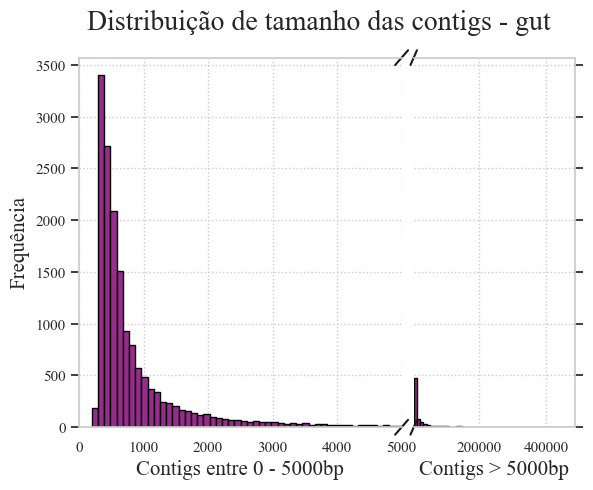

In [15]:
# File path
file_path = 'contig_info_gut.txt'

# Open and read the file
with open(file_path, 'r') as file:
    content = file.readlines()

#Extração dos valores de tamanho (len)
lens = [int(re.search(r'len=(\d+)', line).group(1)) for line in content if 'len=' in line]

# Cálculo de metricas
len_min = np.min(lens)
len_max = np.max(lens)
len_mean = np.mean(lens)
len_distribution, bin_edges = np.histogram(lens, bins='auto')  # Distribution in auto bins for histogram

# Display results
print("Minimum Length:", len_min)
print("Maximum Length:", len_max)
print("Mean Length:", len_mean)
print("Histogram Distribution:", len_distribution)

# valor para dividir os dados
threshold = 5000

# Split data
data_below_threshold = np.array(lens)[np.array(lens) <= threshold]
data_above_threshold = np.array(lens)[np.array(lens) > threshold]

# Criação da figura e subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [2, 1]})
fig.subplots_adjust(wspace=0.05)

# Plote histograma 
ax1.hist(data_below_threshold, bins=50, color='#962d8a', edgecolor='black')
ax1.set_xlim(0, threshold)
ax1.set_xlabel(f'Contigs entre 0 - {threshold}bp', fontsize=15)
ax1.set_ylabel('Frequência', fontsize=15)

# Plot histogram for data above the threshold
#ax2.hist(data_above_threshold, bins=50, color='#ffdde0', edgecolor='black') #milk
ax2.hist(data_above_threshold, bins=50, color='#962d8a', edgecolor='black') #gut

ax2.set_xlim(threshold, len_max)  # limite para o maio valor de dados
ax2.set_xlabel(f'Contigs > {threshold}bp', fontsize=15)

# Adição do "gap" 
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()

# Adição das barras para o "break" no eixo x
d = .02  # Size of break
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

plt.suptitle("Distribuição de tamanho das contigs - gut", fontsize = 20)

histogram_path = 'histogram_len_distribution_gut.png'
plt.savefig(histogram_path)
# Show the plot
plt.show()
